# Part II - Ford GoBike Trips in February 2019
## by Chidinma Ononuju

## Investigation Overview


In this investigation, I wanted to look at features associated with longer trips. My main focus was on user types, age, gender, distance, and days of the week

## Dataset Overview

The Ford GoBike dataset used contains 183412 observations gathered about individual rides made in a bike sharing system covering the greater San Francisco Bay area in February 2019. There are 16 features present in the dataset, with main feature focus on duration of the trip, user type, days most trips were taken, gender, age and if gobike was used for all trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata_clean_no_outliers.csv')

In [3]:
print(df.shape)
df.sample()

(183215, 17)


,duration_sec,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,Age,trip_id,distance(KM),start_month,end_month,start_day,end_day
127719,3020,The Embarcadero at Sansome St,37.80477,-122.403234,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,Female,No,20,127878,2.05066,February,February,Sunday,Sunday


## Duration Distribution

The trip duration in the dataset took on a large range of values, with trip duration ranging from as low as 61 seconds to as high as 85444 seconds. A logarithmic transformation on the scale was used to attain a unimodal model closely resembling normal distribution with a skew to the right as can be seen below:

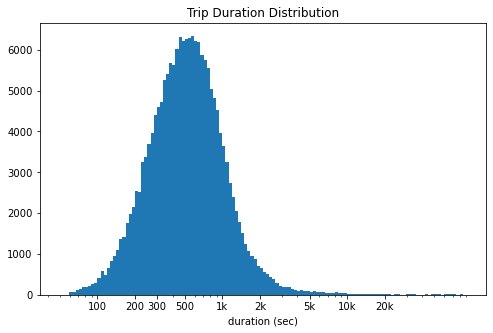

In [4]:
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 200, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [100, 200, 300, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration (sec)')
plt.title('Trip Duration Distribution')
plt.show()

## Age Distribution

The Age feature was derived by subtracting the member birth years provided in the original dataset by 2019, which was when the data was collected. The average age, excluding outliers was 34years. The plot produced a gradual right skewed unimodal model as can be seen.

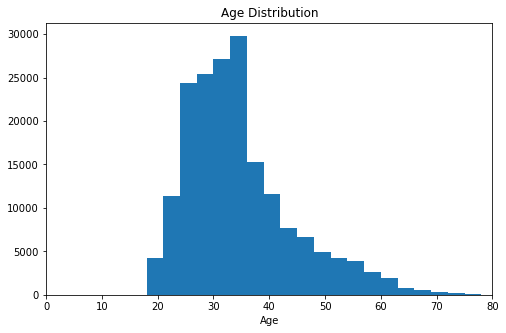

In [5]:
def plot_hist_lim(binsize, col, col_name, df, lim, title):
    binsize = binsize
    bins = np.arange(0, col.max()+binsize, binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = col_name, bins = bins)
    plt.xlim(lim)
    plt.xlabel(col_name)
    plt.title(title)
    plt.show()

plot_hist_lim(3, df.Age, 'Age', df, (0,80), 'Age Distribution')

## User Type and Gender distribution

In the month of February, the observations in our dataset recorded more subscribers than customers using the forg GoBike for their trips and more male occurences than females.

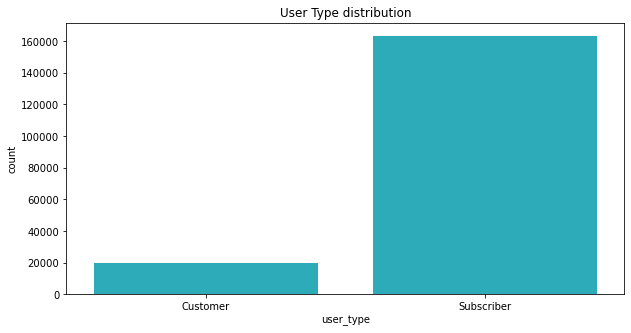

In [6]:
fig, ax = plt.subplots(figsize = [10,5])

default_color = sb.color_palette()[9]
sb.countplot(data = df, x = 'user_type', color = default_color, ax = ax)

plt.title('User Type distribution')
plt.show()



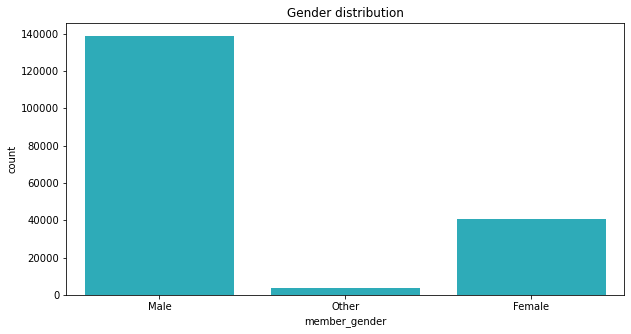

In [7]:
fig, ax = plt.subplots(figsize = [10,5])

default_color = sb.color_palette()[9]
sb.countplot(data = df, x = 'member_gender', color = default_color, ax = ax)

plt.title('Gender distribution')
plt.show()

## Trip duration against gender and user type

As seen in the previous slide, there are more subscribers than customers, however, we can see below that the customers take longer trips than actual subscribers. 

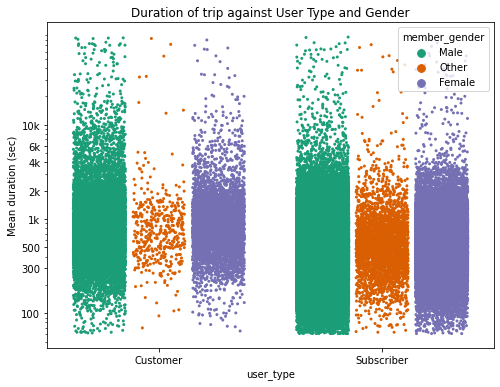

In [9]:
# Duration of trip against User Type and gender
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Dark2', dodge=True, jitter=0.35, size=3)
plt.title('Duration of trip against User Type and Gender')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([100, 300, 500, 1e3, 2e3, 4e3, 6e3, 1e4], [100, 300, 500, '1k', '2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

## Trip duration against days and user type¶

FRom our dataset, most trips taken were recorded to be taken on Thursdays, however, in comparing the days with the average duration taken for each trips on all the days in the week, we can see that the average duration is higher on Saturdays and Sundays as against the popular Thursday

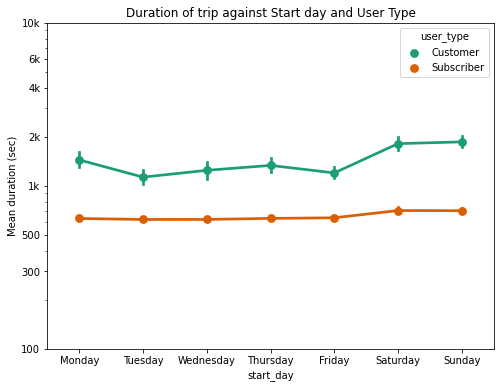

In [11]:
# Duration of trip against Start day and User Type
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Dark2', order=day_order)
plt.title('Duration of trip against Start day and User Type')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([100, 300, 500, 1e3, 2e3, 4e3, 6e3, 1e4], [100, 300, 500, '1k', '2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

In [13]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 807449 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Chidinma\Desktop\sample_project\env\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Chidinma\Desktop\sample_project\env\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Chidinma\Desktop\sample_project\env\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Chidinma\Desktop\sample_project\env\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Chidinma\Desktop\sample_project\env\lib\site-packages\nbconvert\nbconvert